# Plotting data from Excel or CSV files
The plotting capabilities of the Excel spreadsheet program are intended for business plots, and so leave a lot to be desired for plotting scientific data. Fortunately, this is relatively easy in Python with Matplotlib. 

First we need to import the modules that we require. The Pandas module is intended to read and write data, and has a component to read and write Excel files. It is not the only module that does this. There is also a module called csv, that would work just as well, but differently. Since Pandas is widely used, I will demonstrate its use here.

We also import matplotlib.plt, which allows us to do plotting. It is very comprehensive and well documented. Alternatives are Bokeh, which makes Javascript enabled plots, and Plotly, which is a commercial plotter.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Once Pandas is enabled, we can use it to rear the csv file that the AD produced. To read an Excel xlmx file you can use "pandas.read_excel" instead.

In [2]:
data_blue = pandas.read_csv("IV_Curve_Blue_LED.csv")

The data from the file is now read into the data_blue variable. We can inspect what was in the file with the "head()" function, that will print the titles and the first few values.

In [3]:
data_blue.head()

,Channel 1 (V),Channel 2 (V),Math 1 (mA)
0,-4.863828,-0.001978,-0.008991
1,-4.867527,-0.001978,-0.008991
2,-4.867527,-0.002313,-0.010513
3,-4.871227,-0.002313,-0.010513
4,-4.874927,-0.001978,-0.008991


To access individual values, we would specify which column, e.g. "Channel 1(V)", and which row. We see that the actual data was more accurate than the head() function printed.

In [4]:
print(data_blue['Channel 1 (V)'][3])

-4.87122694483


We now want to plot two of the columns against each other. We want "Math 1(mA)" on the y axis and "Channel 1(V)" on the x-axis. We tell plt (Matplotlib.pyplot) that we was a figure, we plot the data, we label the axis and give the plot a title, then show the results.

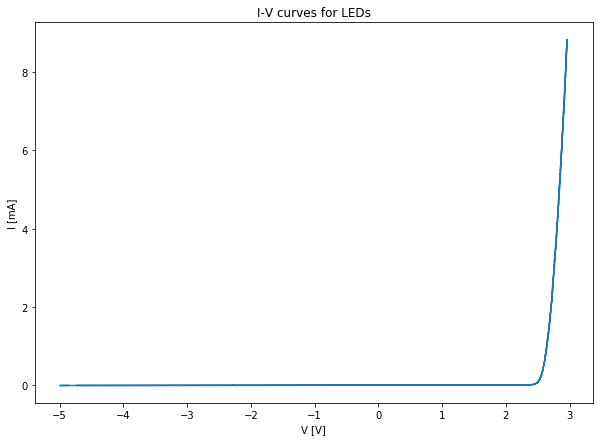

In [7]:
plt.figure(figsize=(10,7))   # Set the size of your plot. It will determine the relative size of all the labels.
plt.plot(data_blue['Channel 1 (V)'],data_blue['Math 1 (mA)'],label="Blue Led") # Plot a curve.
plt.xlabel("V [V]")
plt.ylabel("I [mA]")
plt.title("I-V curves for LEDs")
plt.show()

Depending on the oscilloscope settings, you can get the occasional artifact in the graph. Note that the wavegenerator swept back and forth between -5V and 5V, and where it started and stopped depended on details like the time scale and the trigger settings. If *your* curve does not look like this, you may need to limit the data set to a range where voltage sweep was from a negative to a positive value, and nothing else.

To get multiple curves, we repeat some of the statements, we read a different file, but plot the results at the same time.

In [16]:
data_green = pandas.read_csv("IV_Curve_Green_LED.csv")
data_red = pandas.read_csv("IV_Curve_Red_LED.csv")
data_orange = pandas.read_csv("IV_Curve_Orange_LED.csv")
data_aqua= pandas.read_csv("IV_Curve_Aqua_LED.csv")
data_violet= pandas.read_csv("IV_Curve_Violet_LED.csv")
data_yellow= pandas.read_csv("IV_Curve_Yellow_LED.csv")

In [17]:
data_green.head()

,Channel 1 (V),Channel 2 (V),Math 1 (mA)
0,-4.863828,-0.002313,-0.010513
1,-4.867527,-0.001978,-0.008991
2,-4.867527,-0.002313,-0.010513
3,-4.871227,-0.002313,-0.010513
4,-4.871227,-0.001978,-0.008991


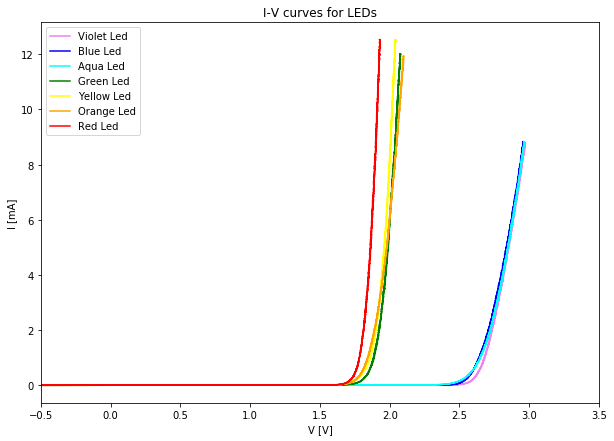

In [24]:
plt.figure(figsize=(10,7))   # Set the size of your plot. It will determine the relative size of all the labels.
plt.plot(data_violet['Channel 1 (V)'],data_violet['Math 1 (mA)'],color="violet",label="Violet Led") 
plt.plot(data_blue['Channel 1 (V)'],data_blue['Math 1 (mA)'],color="blue",label="Blue Led") # Plot a curve.
plt.plot(data_aqua['Channel 1 (V)'],data_aqua['Math 1 (mA)'],color="aqua",label="Aqua Led")
plt.plot(data_green['Channel 1 (V)'],data_green['Math 1 (mA)'],color="green",label="Green Led") # Plot a curve.
plt.plot(data_yellow['Channel 1 (V)'],data_red['Math 1 (mA)'],color="yellow",label="Yellow Led") 
plt.plot(data_orange['Channel 1 (V)'],data_orange['Math 1 (mA)'],color="orange",label="Orange Led") 
plt.plot(data_red['Channel 1 (V)'],data_red['Math 1 (mA)'],color="red",label="Red Led") 
plt.xlabel("V [V]")
plt.xlim((-0.5,3.5))
plt.ylabel("I [mA]")
plt.legend(loc="upper left")
plt.title("I-V curves for LEDs")
plt.savefig("LED_curves.pdf")
plt.show()

Note that I limited the range of the x-axis to make the curves stand out more clearly. Also note that the LEDs I used were not all by the same manufacturer, and different manufacturers can make slightly different LED even when the color is the same. You can still see that the turn-on voltage for the LEDs differs by color and the effective resistance, as you can see from the slope, of the LEDs is also slightly different depending on the type.